<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:20px;" src='Figures/alinco.png' width="120"/>
<h1 style="color:#000047;">Tarea 3: Algoritmos de detección de Outliers Multivariados</h1>
<br style="clear:both"/>
</div>


<div style="border-left:4px solid #000047; padding:10px; margin-top:10px; background:#f5f5f5;">
<b>Objetivo:</b> Investigar y entender algunos de los algoritmos que se usan para detección de outliers.
</div>

<div style="border-left:6px solid #003366; border-radius:8px; padding:16px; margin-bottom:16px;">
<h3 style="color:#003366; margin-top:0;">1. Local Outlier Factor (LOF) <span style='font-size:0.8em; color:#888;'>&#128200;</span></h3>
<p style="font-size:1.08em;">
El <b>Local Outlier Factor (LOF)</b> es un algoritmo no supervisado que detecta anomalías comparando la densidad local de cada punto con la de sus vecinos. Si la densidad de un punto es significativamente menor que la de sus vecinos, se considera un outlier.
</p>
<ul style="font-size:1.05em;">
<li>Consulta el artículo original: <a href="https://dl.acm.org/doi/pdf/10.1145/335191.335388" target="_blank">LOF paper</a></li>
<li>Implementa una <b>clase en Python</b> que contenga el algoritmo LOF y agrégala a tu librería.</li>
<li>Prueba tu implementación con el dataset <code>insurance.csv</code> que se encuentra en la carpeta de Data:</li>
  <ul>
    <li>Detecta los outliers usando tu clase.</li>
    <li>Compara los resultados con el modelo LOF de <code>sklearn</code>.</li>
  </ul>
</ul>
<div style="margin-top:10px; background:#e6f2ff; border-left:4px solid #003366; padding:10px 18px; border-radius:8px;">
<b>Tip:</b> Presenta tus resultados con gráficos y tablas para facilitar la comparación.
</div>
</div>

    age     bmi      charges  MyLOF_score  MyLOF_label  Sklearn_LOF_score  \
0    19  27.900  16884.92400     0.984850            1           0.984850   
1    18  33.770   1725.55230     1.000632            1           1.000632   
2    28  33.000   4449.46200     0.949426            1           0.949426   
3    33  22.705  21984.47061     1.017752            1           1.017752   
4    32  28.880   3866.85520     1.013271            1           1.013271   
5    31  25.740   3756.62160     1.062635            1           1.062635   
6    46  33.440   8240.58960     0.969543            1           0.969543   
7    37  27.740   7281.50560     0.957789            1           0.957789   
8    37  29.830   6406.41070     0.988015            1           0.988015   
9    60  25.840  28923.13692     1.060058            1           1.060058   
10   25  26.220   2721.32080     0.975886            1           0.975886   
11   62  26.290  27808.72510     0.967977            1           0.967977   

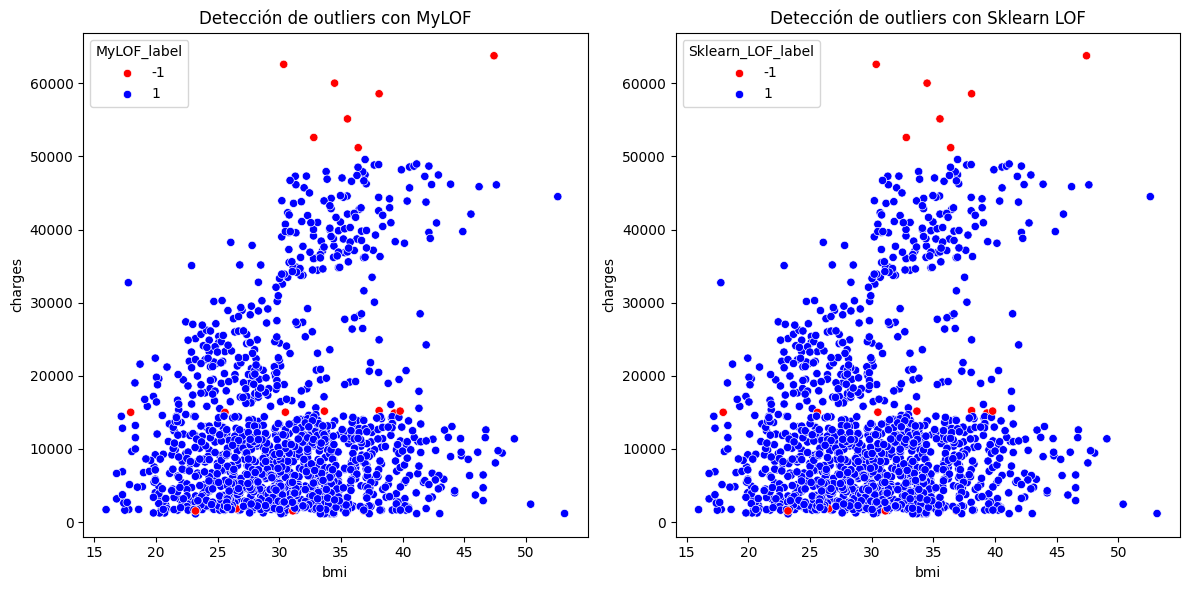

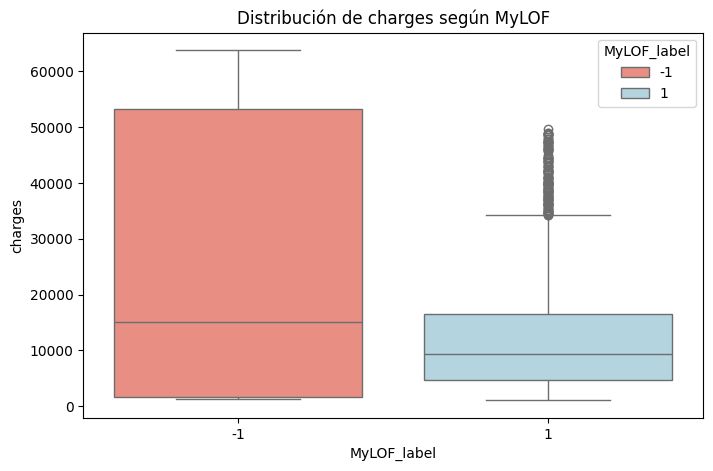

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

class MyLOF:
    def __init__(self, n_neighbors=20):
        self.n_neighbors = n_neighbors
        self.scores_ = None

    def fit(self, X):
        from sklearn.metrics import pairwise_distances
        distances = pairwise_distances(X)

        # Vecinos más cercanos
        neighbors = np.argsort(distances, axis=1)[:, 1:self.n_neighbors+1]

        # Distancia de alcance
        reach_dist = np.zeros_like(distances)
        for i in range(X.shape[0]):
            for j in neighbors[i]:
                reach_dist[i, j] = max(distances[i, j], distances[j, neighbors[j][-1]])

        # Densidad local
        lrd = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            denom = np.sum(reach_dist[i, neighbors[i]])
            lrd[i] = self.n_neighbors / denom if denom > 0 else 0

        # Factor LOF
        lof_scores = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            lof_scores[i] = np.sum(lrd[neighbors[i]]) / (self.n_neighbors * lrd[i])

        self.scores_ = lof_scores
        return self

    def predict(self, threshold=1.5):
        return np.where(self.scores_ > threshold, -1, 1)  # -1 = outlier, 1 = normal



df = pd.read_csv("insurance.csv")


X = df[["age", "bmi", "charges"]].values


# Aplicar mi LOF

mylof = MyLOF(n_neighbors=20).fit(X)
df["MyLOF_score"] = mylof.scores_
df["MyLOF_label"] = mylof.predict()


# Aplicar LOF de sklearn

sklof = LocalOutlierFactor(n_neighbors=20)
labels = sklof.fit_predict(X)
df["Sklearn_LOF_score"] = -sklof.negative_outlier_factor_
df["Sklearn_LOF_label"] = labels


# Comparación en tabla

print(df[["age", "bmi", "charges", "MyLOF_score", "MyLOF_label", "Sklearn_LOF_score", "Sklearn_LOF_label"]].head(20))


# Gráficos comparativos

plt.figure(figsize=(12,6))

# Scatter con etiquetas de nuestro LOF
plt.subplot(1,2,1)
sns.scatterplot(x=df["bmi"], y=df["charges"], hue=df["MyLOF_label"], palette={1:"blue",-1:"red"})
plt.title("Detección de outliers con MyLOF")

# Scatter con etiquetas de sklearn LOF
plt.subplot(1,2,2)
sns.scatterplot(x=df["bmi"], y=df["charges"], hue=df["Sklearn_LOF_label"], palette={1:"blue",-1:"red"})
plt.title("Detección de outliers con Sklearn LOF")

plt.tight_layout()
plt.show()


# Boxplot para ver distribución de charges

plt.figure(figsize=(8,5))
sns.boxplot(x=df["MyLOF_label"], y=df["charges"], hue=df["MyLOF_label"], palette={1:"lightblue", -1:"salmon"})
plt.title("Distribución de charges según MyLOF")
plt.show()

<div style="border-left:6px solid #b36b00; border-radius:8px; padding:16px; margin-bottom:16px;">
<h3 style="color:#b36b00; margin-top:0;">2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) <span style='font-size:0.8em; color:#888;'>&#128201;</span></h3>
<p style="font-size:1.08em;">
<b>DBSCAN</b> es un algoritmo de clustering basado en densidad que agrupa puntos cercanos y considera como outliers (ruido) aquellos que no pertenecen a ningún grupo. A diferencia de K-means, no requiere especificar el número de clusters previamente.
</p>
<ul style="font-size:1.05em;">
<li>Implementa una <b>clase en Python</b> que contenga el algoritmo DBSCAN y agrégala a tu librería.</li>
<li>Prueba tu implementación con el dataset <code>insurance.csv</code> que se encuentra en la carpeta de Data:</li>
  <ul>
    <li>Detecta los outliers usando tu clase.</li>
    <li>Compara los resultados con el modelo DBSCAN de <code>sklearn</code>.</li>
  </ul>
</ul>
<div style="margin-top:10px; background:#fffbe6; border-left:4px solid #b36b00; padding:10px 18px; border-radius:8px;">
<b>Tip:</b> Explica brevemente las diferencias entre los resultados obtenidos por tu clase y los de <code>sklearn</code>.
</div>
</div>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

# ==============================
# Clase propia para DBSCAN
# ==============================
class MyDBSCAN:
    def __init__(self, eps=5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None

    def fit(self, X):
        n = X.shape[0]
        labels = np.full(n, -1)  # -1 = ruido/outlier
        cluster_id = 0

        # Función para encontrar vecinos
        def region_query(point_idx):
            distances = np.linalg.norm(X - X[point_idx], axis=1)
            return np.where(distances <= self.eps)[0]

        visited = np.zeros(n, dtype=bool)

        for i in range(n):
            if visited[i]:
                continue
            visited[i] = True
            neighbors = region_query(i)

            if len(neighbors) < self.min_samples:
                labels[i] = -1  # ruido
            else:
                # Expandir cluster
                labels[i] = cluster_id
                seeds = list(neighbors)
                while seeds:
                    j = seeds.pop()
                    if not visited[j]:
                        visited[j] = True
                        new_neighbors = region_query(j)
                        if len(new_neighbors) >= self.min_samples:
                            seeds.extend(new_neighbors)
                    if labels[j] == -1:
                        labels[j] = cluster_id
                cluster_id += 1

        self.labels_ = labels
        return self


# Cargar dataset
df = pd.read_csv("insurance.csv") # Ruta corregida

# Seleccionamos variables numéricas
X = df[["age", "bmi", "charges"]].values


# Aplicar DBSCAN
mydb = MyDBSCAN(eps=1000, min_samples=10).fit(X)
df["MyDBSCAN_label"] = mydb.labels_

# Aplicar DBSCAN de sklearn
skdb = DBSCAN(eps=1000, min_samples=10)
df["Sklearn_DBSCAN_label"] = skdb.fit_predict(X)


# Comparación de datos en tabla
print(df[["age", "bmi", "charges", "MyDBSCAN_label", "Sklearn_DBSCAN_label"]].head(20))

    age     bmi      charges  MyDBSCAN_label  Sklearn_DBSCAN_label
0    19  27.900  16884.92400               0                     0
1    18  33.770   1725.55230               0                     0
2    28  33.000   4449.46200               0                     0
3    33  22.705  21984.47061               0                     0
4    32  28.880   3866.85520               0                     0
5    31  25.740   3756.62160               0                     0
6    46  33.440   8240.58960               0                     0
7    37  27.740   7281.50560               0                     0
8    37  29.830   6406.41070               0                     0
9    60  25.840  28923.13692               0                     0
10   25  26.220   2721.32080               0                     0
11   62  26.290  27808.72510               0                     0
12   23  34.400   1826.84300               0                     0
13   56  39.820  11090.71780               0                  

# Nueva sección

In [10]:
#Resumen estadístico

# Conteo de clusters
my_clusters = len(set(df["MyDBSCAN_label"])) - (1 if -1 in df["MyDBSCAN_label"].values else 0)
sk_clusters = len(set(df["Sklearn_DBSCAN_label"])) - (1 if -1 in df["Sklearn_DBSCAN_label"].values else 0)

# Conteo de outliers
my_outliers = sum(df["MyDBSCAN_label"] == -1)
sk_outliers = sum(df["Sklearn_DBSCAN_label"] == -1)

# Total de registros
total = len(df)

# Porcentajes
my_outlier_pct = my_outliers / total * 100
sk_outlier_pct = sk_outliers / total * 100

# Mostrar resumen
print("=== Resumen Estadístico DBSCAN ===")
print(f"Total de registros: {total}")
print(f"MyDBSCAN -> Clusters: {my_clusters}, Outliers: {my_outliers} ({my_outlier_pct:.2f}%)")
print(f"Sklearn DBSCAN -> Clusters: {sk_clusters}, Outliers: {sk_outliers} ({sk_outlier_pct:.2f}%)")


=== Resumen Estadístico DBSCAN ===
Total de registros: 1338
MyDBSCAN -> Clusters: 2, Outliers: 9 (0.67%)
Sklearn DBSCAN -> Clusters: 2, Outliers: 9 (0.67%)
